In [171]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

# 범주형 수치형 인코딩 및 정규화 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

keras = tf.keras

In [172]:
import tensorflow as tf

from math import sqrt
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

keras = tf.keras

In [173]:
# 한글 표기를 위한 처리

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [174]:
# 데이터 로드
df = pd.read_csv('../data/train.csv')
df.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,5475.0,92334.0,1704.0,6359.0,1331.0,40028.0,348.0,4374.9,13242.0,16550.5,2339.0,10528.0,1729.0,13885.0,804.0,3853.0,3703.0,15797.0,2576.0,14634.0,1474.0,30950.0,1621.0,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,5210.0,994328.1,1716.0,262615.5,1212.0,1074699.1,345.0,122613.5,9923.0,427435.1,2153.0,82113.5,3960.0,558950.2,794.0,104930.3,4871.0,277326.5,2440.0,159800.0,1750.0,291057.0,1834.0,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,5387.0,787716.0,1715.0,221850.5,1197.0,825681.9,350.0,79055.9,9529.0,334636.8,2220.0,80144.0,3333.0,444353.7,763.0,100699.5,5129.0,218465.2,2437.0,153084.0,1822.0,194626.5,1833.0,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [175]:
# df.iloc[:, 1]

In [176]:
cp_df = df.copy()

In [177]:
# 요일 범주형 > 라벨인코딩 처리
le = LabelEncoder()
le.fit(cp_df.iloc[:, 1])
cp_df['요일']=le.transform(cp_df.iloc[:, 1])

In [178]:
# df.head()

In [179]:
# 데이터 결측치 확인
# for col in df.columns:
#     print('column : {0} \t\t 결측치 : {1}'.format(col, df[col].isnull().sum()))

In [180]:
# 이상치 확인
# df[df.columns].boxplot(figsize=(20, 15)
#                                     , vert=False
#                                     , flierprops=dict(markerfacecolor='r', marker='s'))

In [181]:
# 품목별 가격
# df.iloc[:, 3::2].plot(figsize=(20, 30), subplots=True)

In [182]:
# # 품목별 거래량
# df.iloc[:, 2::1].plot(figsize=(20, 30), subplots=True)

In [183]:

# df.iloc[:,3::2].hist(figsize=(20, 30))

In [184]:
# 거래량
# df.iloc[:,2::1].hist(figsize=(20, 30))

In [185]:
cp_df.head(5)

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,5,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,5475.0,92334.0,1704.0,6359.0,1331.0,40028.0,348.0,4374.9,13242.0,16550.5,2339.0,10528.0,1729.0,13885.0,804.0,3853.0,3703.0,15797.0,2576.0,14634.0,1474.0,30950.0,1621.0,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,3,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,5210.0,994328.1,1716.0,262615.5,1212.0,1074699.1,345.0,122613.5,9923.0,427435.1,2153.0,82113.5,3960.0,558950.2,794.0,104930.3,4871.0,277326.5,2440.0,159800.0,1750.0,291057.0,1834.0,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,6,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,5387.0,787716.0,1715.0,221850.5,1197.0,825681.9,350.0,79055.9,9529.0,334636.8,2220.0,80144.0,3333.0,444353.7,763.0,100699.5,5129.0,218465.2,2437.0,153084.0,1822.0,194626.5,1833.0,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [186]:
# 데이터 MinMaxScaler정규화 
minmax = MinMaxScaler()
minmax.fit(cp_df.iloc[:, 1:])
cp_df.iloc[:, 1:]=minmax.transform(cp_df.iloc[:, 1:])
# robust = RobustScaler()
# robust.fit(df.iloc[:, 2:])
# df.iloc[:, 2:]=minmax.transform(df.iloc[:, 2:])

In [187]:
# baseline 기반으로 데이터 구분

In [188]:
# train set => date 를 제외 
input_col_list = cp_df.iloc[:, 1:].columns 

# ytrain set => date 요일 거래량을 제외 하고 가격 컬럼만 추출 
label_col_list = cp_df.iloc[:, 3::2].columns

In [189]:
# date index 로 설정
# cp_df.index = cp_df['date']
# cp_df.index.name = 'date'

In [190]:
# for col in input_col_list: 
#     if "가격" in col:
#         print(col)
#     else:
#         print(col)
    

In [191]:
# 이상치 확인
# cp_df.iloc[:,3::3].boxplot(figsize=(20, 15)
#                                     , vert=False
#                                     , flierprops=dict(markerfacecolor='r', marker='s'))

In [192]:
# 이상치 확인
# cp_df.iloc[:, ::2].boxplot(figsize=(20, 15)
#                                     , vert=False
#                                     , flierprops=dict(markerfacecolor='r', marker='s'))

In [193]:
# 이상치에 대한 처리 방안 ? 

In [194]:
print(cp_df.shape)
print("label_col_list", len(label_col_list))
print("input_col_list", len(input_col_list))

(1733, 44)
label_col_list 21
input_col_list 43


In [195]:
# baseline 하이퍼파라미터(참고용)
# device = torch.device("cuda:0")         # GPU 사용
# target_n = 21                           # 맞춰야하는 품목/품종의 수
# learning_rate = 5e-4                    # 학습률
# BATCH_SIZE = 128                        # 배치사이즈
# EPOCHS = 50                             # 총 eopochs
# teacher_forcing = False                 # 교사강요 설정
# n_layers = 3                            # rnn레이어 층
# dropout = 0.2                           # 드롭아웃
# window_size = 7                        # 인코더 시퀀스 길이
# future_size = 7                        # 디코더 시퀀스 길이
# hidden_dim = 128                        # rnn 히든차원
# save_path = f'./models/best_model.pt'   # 모델 저장 경로

In [196]:
# reframed = cp_df.shift(periods=7, axis=0)
# reframed.reset_index(drop=True, inplace=True)
# reframed.head(10)

In [197]:
# cp_df.head(5)

In [198]:
# 56 line 제외 
# label size 21 
# input size 43
# shift 28 > 28일 한 묶음 

# LSTM
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
# def make_dataset(arg_df, input_width=43, label_width=21, arg_shift=14, label_col=None):
def reframed_dataset(arg_df, arg_shift=14):
    features = arg_df.iloc[:, 1:].copy()
    # print(features)

    # 입력값 
    # reframe_dt = pd.DataFrame()
    # print(len(features))
    
    reframe_dt = pd.DataFrame()
    for sft in range(arg_shift, 0, -1):
        shift_dt = features.shift(periods=sft, axis=0)
        shift_dt.reset_index(drop=True, inplace=True)
        reframe_dt.reset_index(drop=True, inplace=True)
        tmp_df = pd.concat([reframe_dt, shift_dt], axis=1)
        reframe_dt = tmp_df.copy()

        
    # print("reframed_df \n")
    # print(reframe_dt)
    # print(reframe_dt)
    new_colnm = [col + '_tg' for col in features.iloc[:, 2::2].columns]
    # print(new_colnm)
    # shisft를 한 데이터와 합쳐서 예측값을 생성
    features_df = pd.DataFrame(features.iloc[:, 2::2].values, columns=new_colnm)
    # print("features \n")
    # print(features_df.head(5))
    # print("reframe_dt \n")
    # print(reframe_dt.head(5))
    temp_df = pd.concat([reframe_dt, features_df], axis=1)
    # reframed = temp_df.copy()
   
    # NaN 값의 row를 제거
    reframed = temp_df.dropna().copy()
    # 주식 결과 하나의 월 단위 12개의 누적 값  1행 train 12 
    # 대상컬럼 포함을 한 상태에서 y => x=8 y=1 미래값 
    
    return reframed

In [199]:
# cp_df.head(5)

In [200]:
cp_df.head(10)

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
1,2016-01-02,0.833333,0.015520,0.0658,0.020797,0.264706,0.024437,0.6405,0.000007,0.064389,0.013751,0.853468,0.070877,0.535512,0.010287,0.442634,0.034353,0.216283,0.017059,0.924333,0.024831,0.166905,0.056230,0.206571,0.018154,0.214400,0.012547,0.283559,0.050133,0.64400,0.086461,0.373070,0.024183,0.220604,0.060900,0.511068,0.000197,0.398376,0.023032,0.356152,0.000590,0.08056,0.0,0.0
2,2016-01-03,0.666667,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
3,2016-01-04,0.500000,0.273068,0.0956,0.440354,0.280882,0.460735,0.6175,0.001690,0.026130,0.129684,0.812159,0.763265,0.539283,0.424853,0.403060,0.922336,0.214419,0.478118,0.692657,0.641277,0.153632,0.438569,0.473118,0.730787,0.211733,0.341704,0.372999,0.880117,0.61000,0.944132,0.442926,0.227416,0.249592,0.457792,0.422302,0.227365,0.386475,0.745976,0.297728,0.001814,0.15540,0.0,0.0
4,2016-01-05,1.000000,0.224029,0.0884,0.368802,0.310294,0.416530,0.6065,0.002690,0.025416,0.115556,0.839751,0.604666,0.538969,0.358904,0.398071,0.708623,0.217526,0.308270,0.665154,0.502053,0.158413,0.428050,0.398208,0.580960,0.203467,0.327927,0.392756,0.693316,0.60925,0.904452,0.461149,0.152071,0.249456,0.387559,0.383287,0.067041,0.428410,0.278846,0.321334,0.005911,0.11412,0.0,0.0
5,2016-01-06,0.333333,0.200665,0.0884,0.493393,0.300735,0.370281,0.6315,0.004042,0.041215,0.083806,0.781450,0.609171,0.509114,0.322181,0.379781,0.781684,0.203232,0.306230,0.567011,0.536729,0.158342,0.410364,0.374313,0.517964,0.209867,0.303021,0.392067,0.596317,0.58575,0.902143,0.384460,0.139713,0.272047,0.369335,0.304981,0.086283,0.478844,0.324451,0.369283,0.005024,0.08476,0.0,0.0
6,2016-01-07,0.166667,0.199593,0.0896,0.372820,0.314706,0.371762,0.6205,0.002879,0.022876,0.320381,0.679657,0.562904,0.485544,0.323747,0.329897,0.717769,0.195774,0.296306,0.474173,0.486011,0.157557,0.261928,0.269892,0.315240,0.205333,0.198305,0.390152,0.574604,0.57275,0.878889,0.345482,0.083875,0.261432,0.331217,0.242612,0.071981,0.460899,0.239051,0.373709,0.003145,0.11988,0.0,0.0
7,2016-01-08,0.000000,0.180924,0.0840,0.405088,0.286765,0.295217,0.6090,0.001626,0.028308,0.065268,0.756041,0.612381,0.467630,0.296151,0.328567,0.663109,0.194531,0.308359,0.393969,0.513051,0.145069,0.376607,0.251613,0.470398,0.188000,0.214339,0.474079,0.556966,0.56350,0.876933,0.341433,0.148943,0.286745,0.347844,0.196680,0.082641,0.435021,0.369582,0.370168,0.003299,0.10936,0.0,0.0
8,2016-01-09,0.833333,0.132263,0.0778,0.446657,0.253676,0.220362,0.6050,0.013191,0.029923,0.060197,0.705690,0.567434,0.450346,0.221927,0.303292,0.569566,0.175264,0.288898,0.357951,0.463734,0.150136,0.324865,0.251971,0.330465,0.194133,0.167501,0.461368,0.561796,0.57700,0.886060,0.322197,0.107066,0.287289,0.378136,0.171278,0.074859,0.384397,0.230253,0.359398,0.001185,0.19092,0.0,0.0
9,2016-01-

In [201]:
# reframed_df = pd.DataFrame()
reframed_df = reframed_dataset(cp_df)
print(reframed_df.shape)

(1719, 623)


In [202]:
# date index 로 설정
# reframed_df.index = reframed_df['date']
# reframed_df.index.name = 'date'

In [203]:
# reframed_df.drop(columns=['date'], inplace=True)
reframed_df.head(20)

,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg)

In [204]:
reframed_df.shape

(1719, 623)

In [205]:
# # baseline 전처리
# # 시계열 학습이 가능한 형태로 전처리
# window_size = 28 
# future_size = 28 

# BATCH_SIZE = 128

# # 과거 28일의 변화를 보고 미래 28일을 예측
# x_data = []
# y_data = []
# print("전처리 데이터 확인 : cp_df.shape:{0}\twindows_size:{1}\tfuture_size:{2}\ndata.shape[0]-window_size-future_size:{3}".format(cp_df.shape[0], window_size, future_size, cp_df.shape[0]-window_size-future_size))
# # 1733 - 56(28 + 28)
# for i in range(cp_df.shape[0]-window_size-future_size):
#     print("="*50, "\ti cnt:", i)
#     x = cp_df.iloc[i:i+window_size, 1:].to_numpy()
#     # pprint(, width=20, indent=4)
#     print("="*50, "x_data make size : ", i, i+window_size)
#     y = cp_df.iloc[i+window_size:i+window_size+future_size, 3::2].to_numpy()
#     # pprint(y, width=20, indent=4)
#     print("="*50, "y_data make size : ", i+window_size, i+window_size, future_size)
#     y_0 = np.zeros([1, y.shape[1]]) # 디코더 첫 입력값 추가
#     # pprint(y_0, width=20, indent=4)
#     print("="*50)
#     x_data.append(x)
#     y_data.append(np.concatenate([y_0, y], axis=0))
#     print("="*50)

In [206]:
# print(x_data[:100][0])

In [207]:
# print(y_data[:100][0])

In [208]:
# # LSTM
# # series를 지도학습으로 (supervised learning)
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     n_vars = 1 if type(data) is list else data.shape[1]
#     df = pd.DataFrame(data)
    
#     cols, names = list(), list()
#     print("="*50)
#     print("cols, names")
#     print(cols, names)
    
#     # 입력값의 순서 (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(df.shift(i))
#         names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
#     # 예측의 순서 (t, t+1, ... t+n)
#     for i in range(0, n_out):
#         cols.append(df.shift(-i))
#         if i == 0:
#             names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
#         else:
#             names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
#     # 합치기
#     agg = pd.concat(cols, axis=1)
#     agg.columns = names
    
#     # NaN 값의 row를 제거
#     if dropnan:
#         agg.dropna(inplace=True)
        
#     return agg

In [209]:
# scaled = cp_df.iloc[:100, :].values

In [210]:
# pd.set_option('display.max_columns', 200)
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [211]:
# reframed = series_to_supervised(scaled, 43, 21)

In [212]:
# reframed.shape

In [213]:
# CNN + RNN window dataSet 생성
# def seq2seq_window_dataset(series, window_size, batch_size=32,
#                            shuffle_buffer=1000):
#     print("seq2seq_window_dataset function")
#     series = tf.expand_dims(series, axis=-1)
#     ds = tf.data.Dataset.from_tensor_slices(series)
#     ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
#     ds = ds.flat_map(lambda w: w.batch(window_size + 1))
#     ds = ds.shuffle(shuffle_buffer)
#     ds = ds.map(lambda w: (w[:-1], w[1:]))
#     return ds.batch(batch_size).prefetch(1)

# def model_forecast(model, series, window_size):
#     ds = tf.data.Dataset.from_tensor_slices(series)
#     ds = ds.window(window_size, shift=1, drop_remainder=True)
#     ds = ds.flat_map(lambda w: w.batch(window_size))
#     ds = ds.batch(32).prefetch(1)
#     forecast = model.predict(ds)
#     return forecast

In [214]:
# # tensorflow LSTM
# class WindowGenerator():
#   def __init__(self, input_width, label_width, shift,
#                train_df=train_df, val_df=val_df, test_df=test_df,
#                label_columns=None):
#     # Store the raw data.
#     self.train_df = train_df
#     self.val_df = val_df
#     self.test_df = test_df

#     # Work out the label column indices.
#     self.label_columns = label_columns
#     if label_columns is not None:
#       self.label_columns_indices = {name: i for i, name in
#                                     enumerate(label_columns)}
#     self.column_indices = {name: i for i, name in
#                            enumerate(train_df.columns)}

#     # Work out the window parameters.
#     self.input_width = input_width
#     self.label_width = label_width
#     self.shift = shift


#     self.total_window_size = input_width + shift
    
#     print("WindowGenerator  self.total_window_size: ", self.total_window_size, input_width, shift)
#     print("WindowGenerator inpuw_width : ", input_width)
#     self.input_slice = slice(0, input_width)
#     print("WindowGenerator self.input_slice : ", self.input_slice)
#     self.input_indices = np.arange(self.total_window_size)[self.input_slice]

#     print("WindowGenerator inpuw_start : ", label_width)
#     self.label_start = self.total_window_size - self.label_width
#     self.labels_slice = slice(self.label_start, None)
#     print("WindowGenerator self.labels_slice : ", self.labels_slice)
#     self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

#   def __repr__(self):
#     return '\n'.join([
#         f'Total window size: {self.total_window_size}',
#         f'Input indices: {self.input_indices}',
#         f'Label indices: {self.label_indices}',
#         f'Label column name(s): {self.label_columns}'])

In [215]:
# def split_window(self, features):
#   inputs = features[:, self.input_slice, :]
#   labels = features[:, self.labels_slice, :]
#   if self.label_columns is not None:
#     labels = tf.stack(
#         [labels[:, :, self.column_indices[name]] for name in self.label_columns],
#         axis=-1)

#   # Slicing doesn't preserve static shape information, so set the shapes
#   # manually. This way the `tf.data.Datasets` are easier to inspect.
#   inputs.set_shape([None, self.input_width, None])
#   labels.set_shape([None, self.label_width, None])

#   return inputs, labels

# WindowGenerator.split_window = split_window

In [216]:
# 56 line 제외 
# label size 21 
# input size 43
# shift 28 > 28일 한 묶음 

In [217]:
# t_df=cp_df.iloc[:, 1:].copy()

In [218]:
# 

In [219]:
# 데이터 세트 분할 
# 훈련, 검증, 테스트 데이터 세트 (70, 20, 10) 
column_indices = {name: i for i, name in enumerate(reframed_df.columns)}
# print(column_indices)

In [220]:
n = len(reframed_df)
train_df = reframed_df[0:int(n*0.7)]
val_df = reframed_df[int(n*0.7):int(n*0.9)]
test_df = reframed_df[int(n*0.9):]

num_features = reframed_df.shape[1]

In [221]:
print(train_df.shape, val_df.shape, test_df.shape)
print(num_features)

(1203, 623) (344, 623) (172, 623)
623


In [222]:
label_len = 21
features_len = 43
window_size = 14 # tiemstamp

In [223]:
len(train_df.columns)

623

In [224]:
623 - 21

602

In [225]:
43 * 14

602

In [226]:
train_df.head(10)

,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg)

In [227]:
train_df.head(5)

features_col_list = [col for col in train_df.columns if '_tg' not in col]
# print(features_col_list)
# print(len(features_col_list))
label_col_list = [col for col in train_df.columns if '_tg' in col]
# print(label_col_list)
print(len(label_col_list))
print(len(features_col_list))


21
602


In [228]:
# baseline 하이퍼파라미터(참고용)
# device = torch.device("cuda:0")         # GPU 사용
# target_n = 21                           # 맞춰야하는 품목/품종의 수
# learning_rate = 5e-4                    # 학습률
BATCH_SIZE = 128                        # 배치사이즈
# EPOCHS = 50                             # 총 eopochs
# teacher_forcing = False                 # 교사강요 설정
# n_layers = 3                            # rnn레이어 층
# dropout = 0.2                           # 드롭아웃
# window_size = 7                        # 인코더 시퀀스 길이
# future_size = 7                        # 디코더 시퀀스 길이
# hidden_dim = 128                        # rnn 히든차원
# save_path = f'./models/best_model.pt'   # 모델 저장 경로

In [229]:
label_len = 21
features_len = 43
window_size = 14 # tiemstamp

In [230]:
# num_features
43*14

602

In [231]:
# 입력값과 출력값으로 분리
train_X, train_y = train_df.iloc[:, :features_len*window_size], train_df.loc[:,label_col_list]
val_X, val_y = val_df.iloc[:, :features_len*window_size], val_df.loc[:,label_col_list]
test_X, test_y = test_df.iloc[:, :features_len*window_size], test_df.loc[:,label_col_list]

In [232]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(1203, 602) (1203, 21)
(344, 602) (344, 21)
(172, 602) (172, 21)


In [233]:
# 범위, 타임스탬프, 컬럼
train_X = train_X.values.reshape((train_X.shape[0], window_size, features_len))
val_X = val_X.values.reshape((val_X.shape[0], window_size, features_len))
test_X = test_X.values.reshape((test_X.shape[0], window_size, features_len))


In [234]:
print(train_y.shape[0])
print(train_y.shape[1])


1203
21


In [235]:
train_y = train_y.values.reshape((train_y.shape[0], 1,train_y.shape[1]))
val_y = val_y.values.reshape((val_y.shape[0], 1, val_y.shape[1]))
test_y = test_y.values.reshape((test_y.shape[0], 1, test_y.shape[1]))
# print(so_train_X.shape, train_y.shape, test_X.shape, test_y.shape)


In [236]:
# train_y

In [237]:
print(train_X.shape, len(train_X), train_y.shape)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1203, 14, 43) 1203 (1203, 1, 21)
(1203, 14, 43) (1203, 1, 21) (172, 14, 43) (172, 1, 21)


In [238]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(1203, 14, 43) (1203, 1, 21)
(344, 14, 43) (344, 1, 21)
(172, 14, 43) (172, 1, 21)


In [239]:
# train_y=train_y.reshape(1203, 1, 21)

In [240]:
train_y.shape

(1203, 1, 21)

In [241]:
keras.backend.clear_session()
np.random.seed(1030)
tf.random.set_seed(1030)

In [242]:
# 하이퍼파라미터
# device = torch.device("cuda:0")         # GPU 사용

# 입력/출력 품목/품종의 수
features_n = 43                         # 입력 품목/품종의 수
target_n = 21                           # 맞춰야하는 품목/품종의 수

BATCH_SIZE = 128                        # 배치사이즈
EPOCHS = 50                             # 총 eopochs
# teacher_forcing = False               # 교사강요 설정
# n_layers = 3                            # rnn레이어 층
# dropout = 0.2                           # 드롭아웃
window_size = 14                        # 인코더 시퀀스 길이, CNN Input shape
future_size = 14                        # 디코더 시퀀스 길이
hidden_dim = 128                        # rnn 히든차원
save_path = f'./models/best_model.pt'   # 모델 저장 경로

# Optimizer 함수 최적화 함수 파라미터
lr_list = [1e-5, 1e-4, 1e-3] # 0.01 기준으로
learning_rate = 5e-4                    # 학습률 0.0005
# Loss(cost) 함수 손실 함수 파라미터

# CNN + RNN 하이퍼 파라미터 
CONV_WIDTH = [3, 5]
filter_size = 32

In [243]:
# 모델 구성 
# conv_lstm_model = keras.Sequential([
#     keras.layers.Conv1D(filters=filter_size, kernel_size=(CONV_WIDTH[1], ),
#                            strides=1, padding="causal", 
#                            activation="relu", 
#                            input_shape=[window_size, features_n]), 
#     keras.layers.LSTM(32, activation='tanh'),
#     keras.layers.LSTM(16, activation='relu'),
#     keras.layers.Dense(target_n),
# ])
# conv_lstm_model.summary()

In [253]:
target_n

21

In [259]:
# 모델 구성 
conv_lstm_model = keras.Sequential([
    keras.layers.Conv1D(filters=filter_size, kernel_size=(CONV_WIDTH[1], ),
                           strides=1, padding="causal", 
                           activation="relu", 
                           input_shape=[window_size, features_n]), 
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LSTM(32, return_sequences=False),
    # keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(target_n)
])
conv_lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 14, 32)            6912      
_________________________________________________________________
lstm_9 (LSTM)                (None, 14, 32)            8320      
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 21)                693       
Total params: 24,245
Trainable params: 24,245
Non-trainable params: 0
_________________________________________________________________


In [260]:
# 옵티마이저 및 로스 함수 정의 
optimizer_func = keras.optimizers.Adam(learning_rate=learning_rate)
# loss_func = keras.losses.MeanAbsoluteError() # MAE 
loss_func = keras.losses.Huber() # Huber 사용 MAE, MSE 를 합친 outlier 의 영향을 덜 받음  

In [261]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss'
                              , patience=10
                              , mode='min')
# val_loss 기준 체크포인터 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = keras.callbacks.ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [262]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)

(1203, 14, 43) (1203, 1, 21)
(344, 14, 43) (344, 1, 21)


In [263]:
conv_lstm_model.compile(loss=loss_func,
                optimizer=optimizer_func,
                metrics=["mae"])

hist=conv_lstm_model.fit(train_X, train_y, epochs=EPOCHS, batch_size=BATCH_SIZE
                         , validation_data=(val_X, val_y), callbacks=[earlystopping]
                         , verbose=2, shuffle=False)

Epoch 1/50
10/10 - 2s - loss: 0.0566 - mae: 0.2688 - val_loss: 0.0470 - val_mae: 0.2432
Epoch 2/50
10/10 - 0s - loss: 0.0405 - mae: 0.2286 - val_loss: 0.0373 - val_mae: 0.2048
Epoch 3/50
10/10 - 0s - loss: 0.0293 - mae: 0.1906 - val_loss: 0.0289 - val_mae: 0.1768
Epoch 4/50
10/10 - 0s - loss: 0.0210 - mae: 0.1561 - val_loss: 0.0232 - val_mae: 0.1538
Epoch 5/50
10/10 - 0s - loss: 0.0169 - mae: 0.1357 - val_loss: 0.0194 - val_mae: 0.1422
Epoch 6/50
10/10 - 0s - loss: 0.0150 - mae: 0.1265 - val_loss: 0.0177 - val_mae: 0.1372
Epoch 7/50
10/10 - 0s - loss: 0.0144 - mae: 0.1238 - val_loss: 0.0171 - val_mae: 0.1350
Epoch 8/50
10/10 - 0s - loss: 0.0143 - mae: 0.1238 - val_loss: 0.0168 - val_mae: 0.1335
Epoch 9/50
10/10 - 0s - loss: 0.0143 - mae: 0.1238 - val_loss: 0.0168 - val_mae: 0.1334
Epoch 10/50
10/10 - 0s - loss: 0.0143 - mae: 0.1237 - val_loss: 0.0168 - val_mae: 0.1335
Epoch 11/50
10/10 - 0s - loss: 0.0142 - mae: 0.1236 - val_loss: 0.0168 - val_mae: 0.1334
Epoch 12/50
10/10 - 0s - loss:

In [265]:
# 저장한 데이터를 로드
# conv_lstm_model.load_weights(filename)

In [266]:
pred = conv_lstm_model.predict(test_X)

In [267]:
pred.shape

(172, 21)

In [268]:
test_y

array([[[0.1394    , 0.27573529, 0.413     , ..., 0.21923871,
         0.2302    , 0.        ]],

       [[0.1516    , 0.26617647, 0.389     , ..., 0.20773089,
         0.14584   , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       ...,

       [[0.352     , 0.79044118, 0.4805    , ..., 0.45618176,
         0.14764   , 0.2659    ]],

       [[0.6132    , 0.8375    , 0.528     , ..., 0.47978755,
         0.14268   , 0.267475  ]],

       [[0.3734    , 0.84338235, 0.482     , ..., 0.41044556,
         0.15044   , 0.27495   ]]])

In [271]:
test_y_df = pd.DataFrame(test_y.reshape(test_y.shape[0]*test_y.shape[1], test_y.shape[2]))

In [269]:
# test_y_df

In [270]:
pred.shape, test_y.shape

((172, 21), (172, 1, 21))

In [273]:
pred_df=pd.DataFrame(pred)

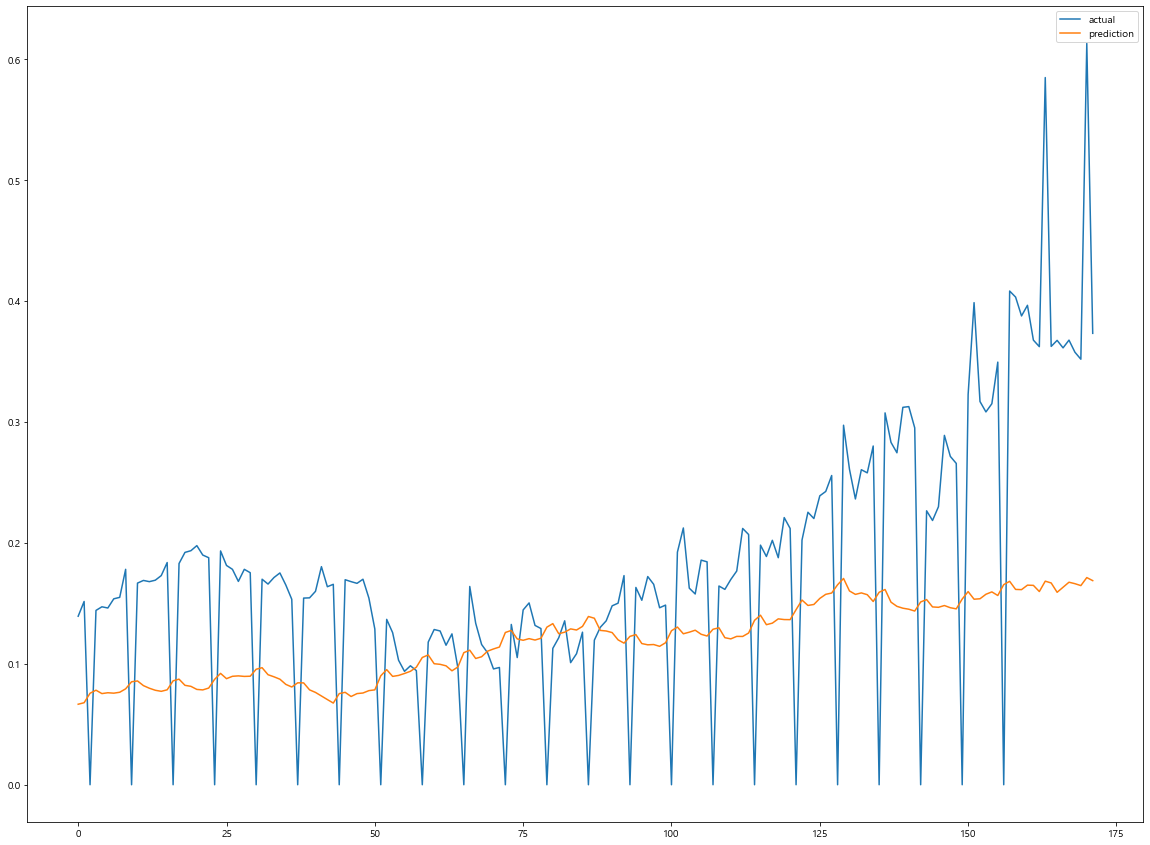

In [275]:
# 예측 데이터 시각화 
plt.figure(figsize=(20, 15))
plt.plot(test_y_df.iloc[:, 0], label='actual')
plt.plot(pred_df.iloc[:, 0], label='prediction')
plt.legend()
plt.show()

In [ ]:
#  검증 데이터로 예측모델 평가
val_evaluate = conv_lstm_model.evaluate(val_X, val_y, verbose=2)
#  테스트 데이터로 예측모델 평가
test_evaluate = conv_lstm_model.evaluate(test_X, test_y, verbose=2)
print("검증 데이터로 예측모델 평가: ", val_evaluate)
print("테스트 데이터로 예측모델 평가", test_evaluate)

# r2 score value 
yhat = conv_lstm_model.predict(test_X)
# yhat.shape
yhat=yhat.reshape(yhat.shape[0])
print("r2 score :", r2_score(test_y, yhat))

In [ ]:
# 예측모델 평가 시각화 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['mae'], 'b', label='train mae')
acc_ax.plot(hist.history['val_mae'], 'g', label='val mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mae')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
pyplot.show()

plt.subplot(2, 1 , 1)
# plot history
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# so_score = so_model.evaluate(so_test_X, so_test_y)
# print(so_score)
